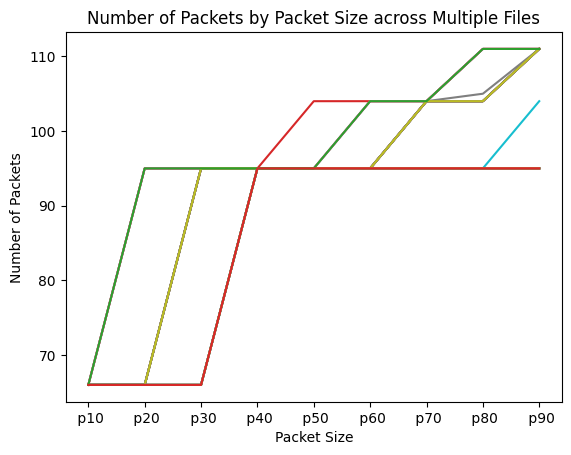

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import os

directory_path = '/Users/ct/Library/Mobile Documents/com~apple~CloudDocs/cybersecurity_robotics/extractedFeatures'  # specify the directory where your CSV files are located
dir_names = os.listdir(directory_path)  # list all files in the directory
dir_names = [dn for dn in dir_names if dn.startswith('capPressKey')]  # keep only .csv files

df_list = []

# iterate over each file and load it into a pandas Series, then append to list
for dn in dir_names:
    fn = os.path.join(directory_path, dn) + "/Stats" + "/Stats.csv"
    df = pd.read_csv(fn, header=None)  # transpose the DataFrame so we have columns and one row
    df.columns = df.iloc[0]  # make the first row as header
    df = df.drop(df.index[0])  # drop the first row
    df = df.loc[:,[' p10PacketSizes', ' p20PacketSizes', ' p30PacketSizes', ' p40PacketSizes', ' p50PacketSizes', ' p60PacketSizes', ' p70PacketSizes', ' p80PacketSizes', ' p90PacketSizes']]  # keep only desired columns
    df = df.apply(pd.to_numeric)  # convert values to numeric

    # Plot packet sizes versus their counts
    xlabel = [col[:4] for col in df.columns]
    plt.plot(xlabel, df.values[0], label=fn)

plt.xlabel('Packet Size')
plt.ylabel('Number of Packets')
plt.title('Number of Packets by Packet Size across Multiple Files')
# plt.legend()
plt.show()